In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Imports for user defined functions
import wrangle as wr
import explore as ex

# plotting defaults
plt.rc('figure', figsize=(13, 6))
plt.style.use('seaborn-whitegrid')
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=14)

## Acquire Prepped Data

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
train, validate, test = wr.wrangle_who()
train.shape, validate.shape, test.shape

((1645, 22), (705, 22), (588, 22))

In [4]:
train.head()

,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling,developing
1782,Myanmar,2013,66.2,22.0,42,0.700000,38.337935,75.000000,1010,22.1,...,2.16000,75.0,0.4,1168.839470,51448196.0,12.9,13.2,0.540,9.1,1
946,Gabon,2015,66.0,229.0,2,4.602861,0.000000,8.000000,27,36.3,...,5.93819,8.0,2.7,7388.984144,193175.0,6.1,5.9,0.694,12.6,1
1682,Mauritius,2000,71.0,177.0,0,4.600000,336.321333,88.000000,0,25.3,...,3.78000,88.0,0.1,3861.324140,1186873.0,8.1,8.1,0.667,12.1,1
2629,Togo,2003,54.7,355.0,15,1.020000,2.995960,80.940461,295,17.9,...,5.00000,72.0,5.2,31.437144,539141.0,8.8,8.7,0.428,9.9,1
422,Burundi,2009,56.2,338.0,23,4.050000,2.030495,94.000000,305,15.7,...,6.96000,94.0,2.4,24.944652,848931.0,7.8,7.8,0.336,8.6,1


## Univariate Exploration

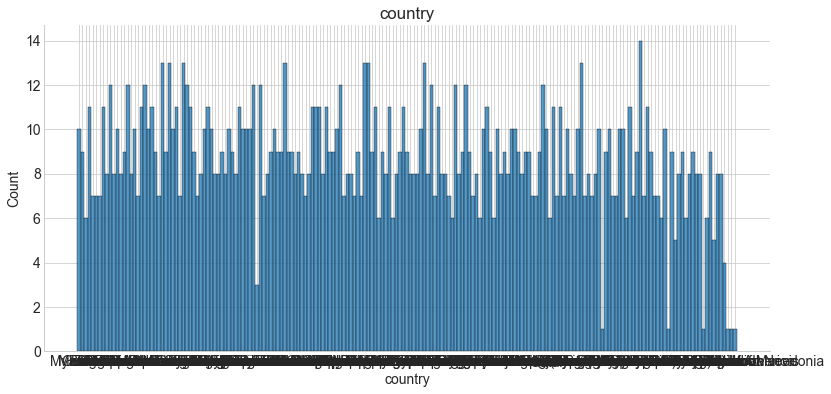

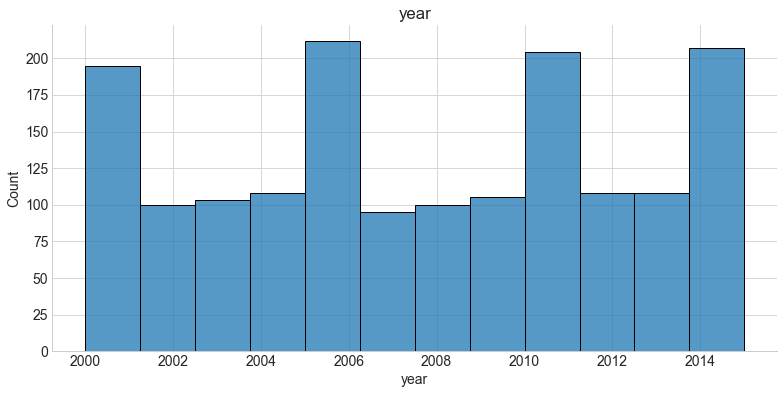

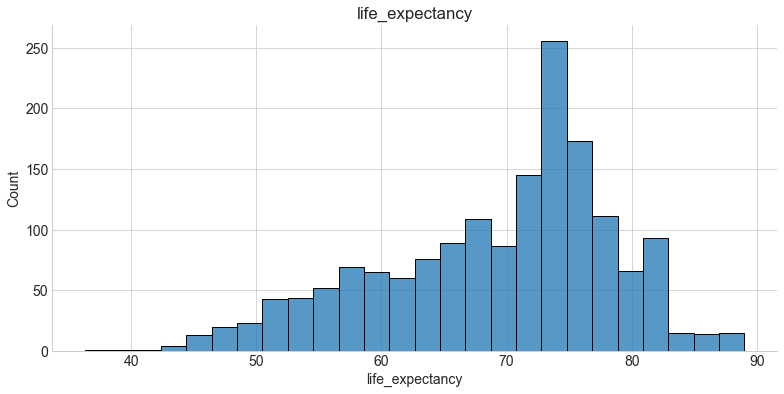

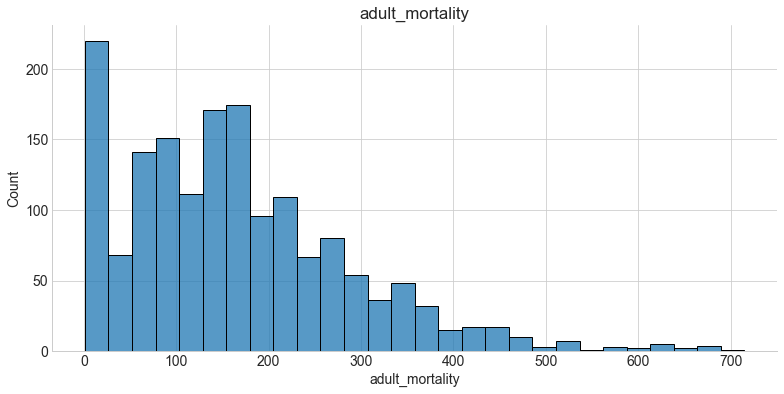

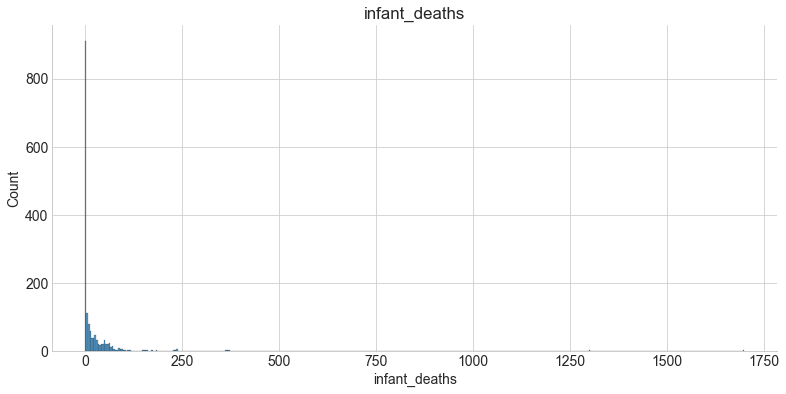

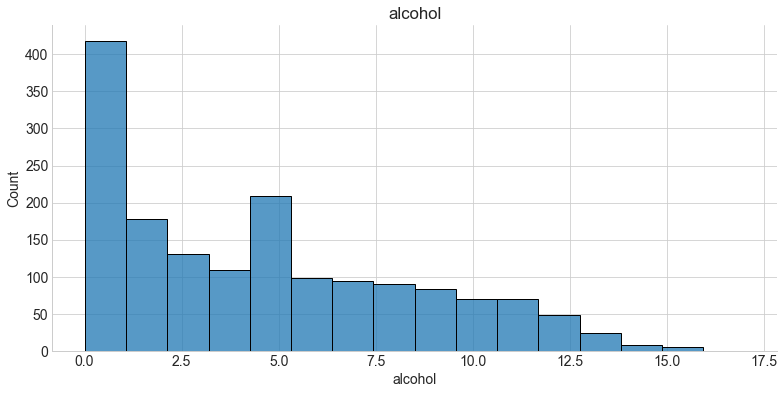

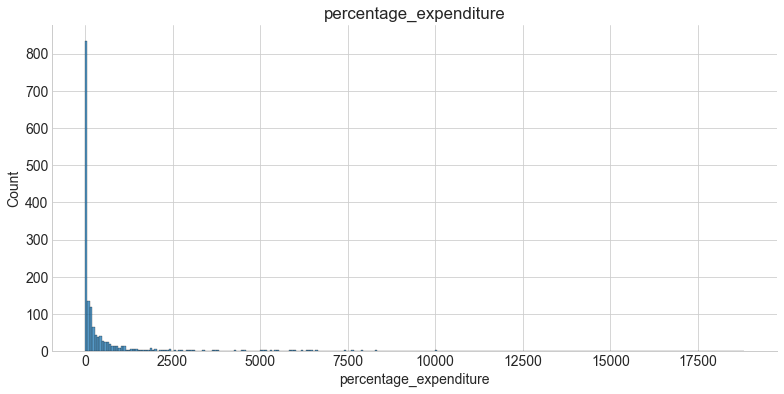

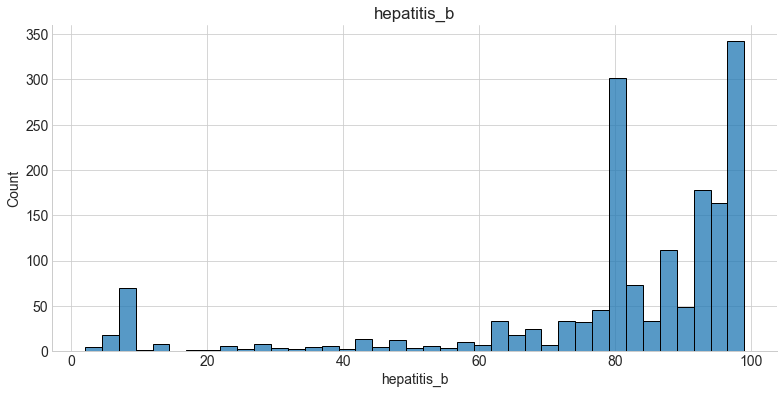

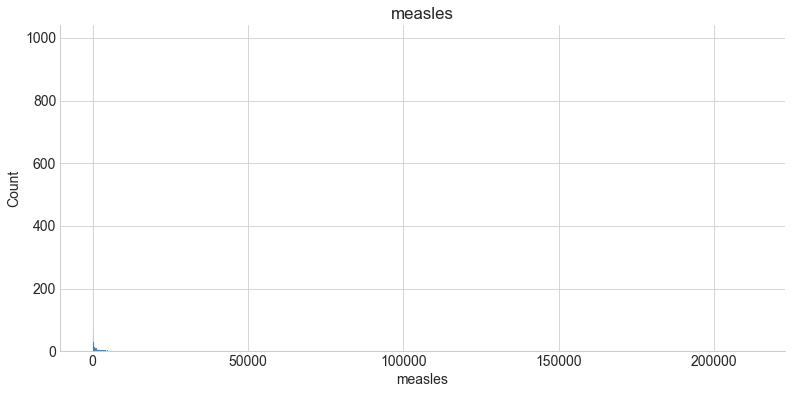

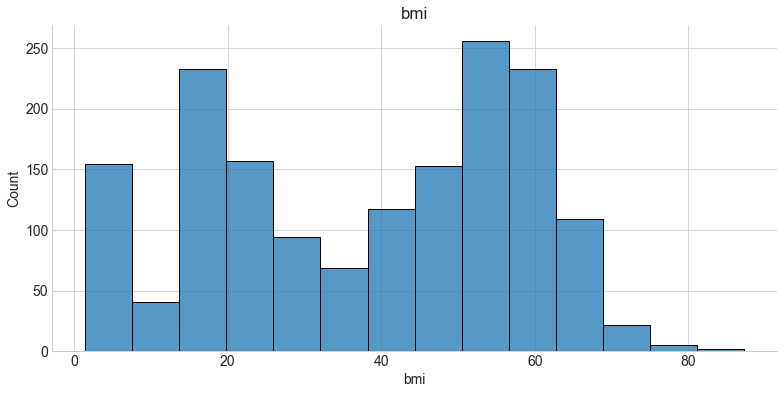

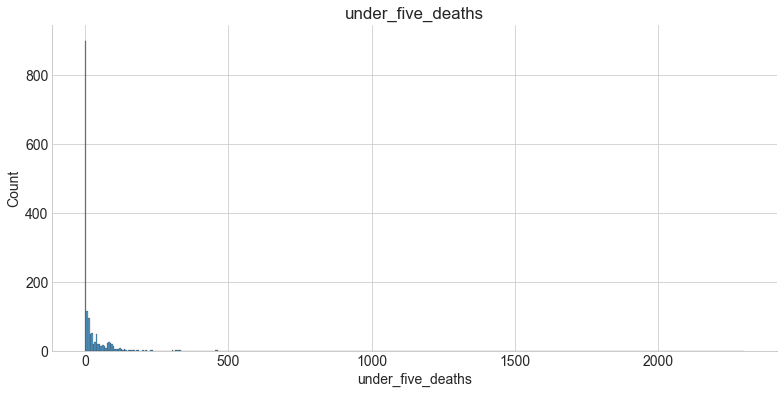

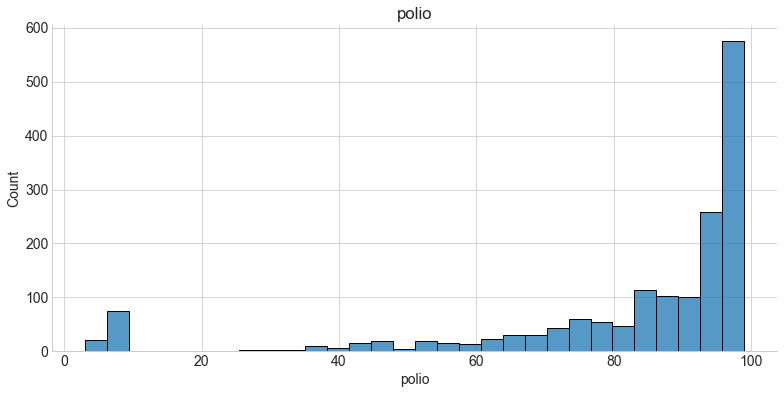

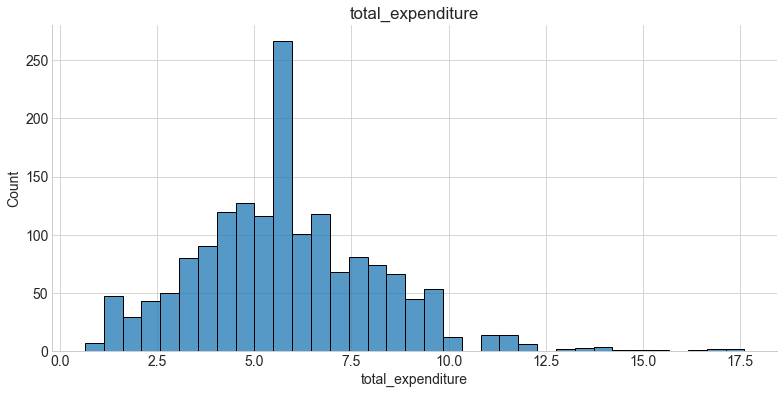

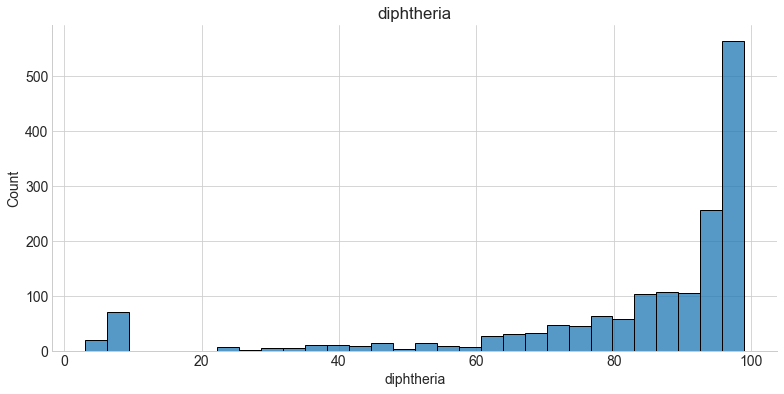

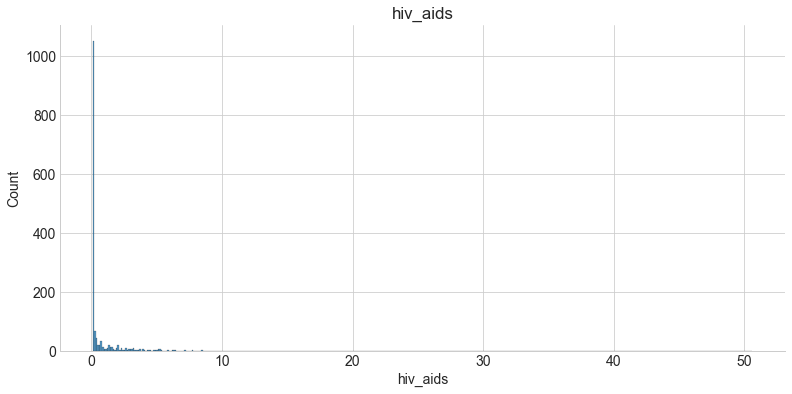

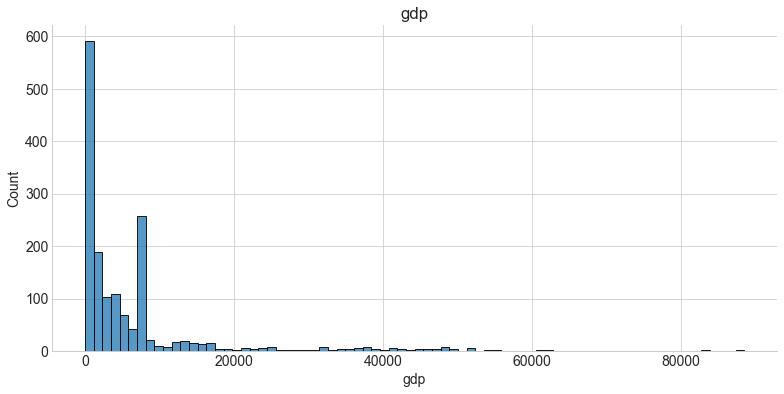

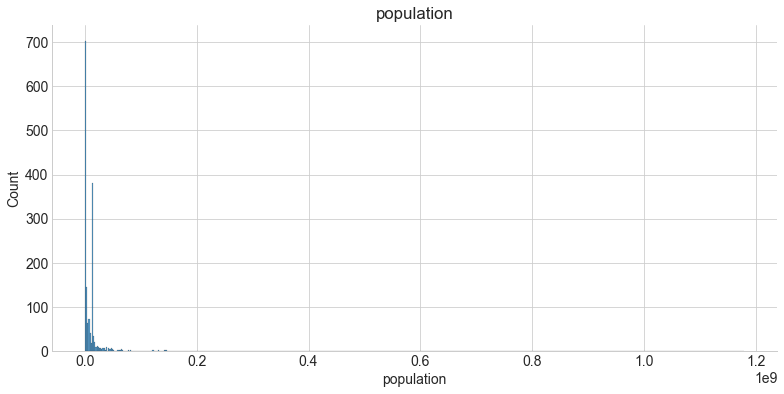

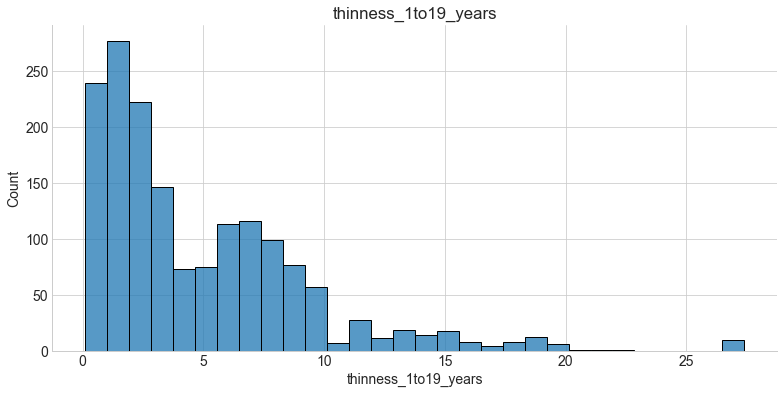

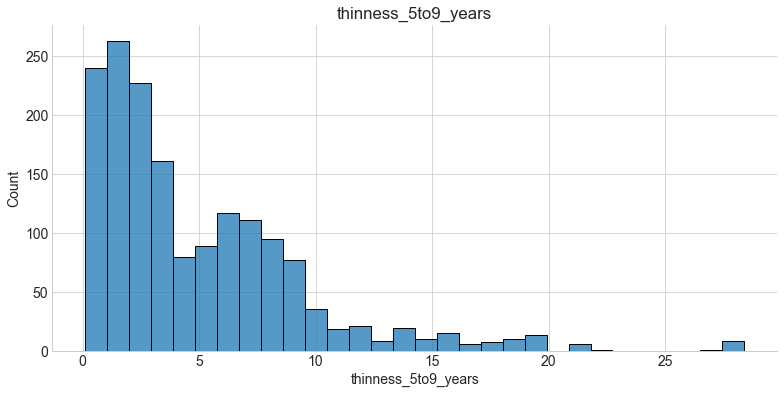

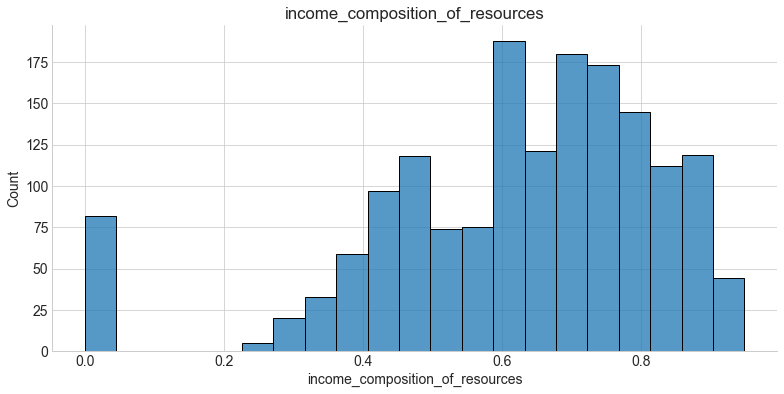

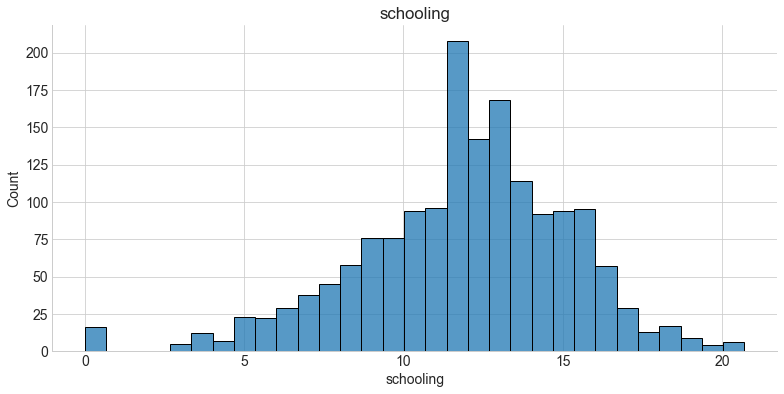

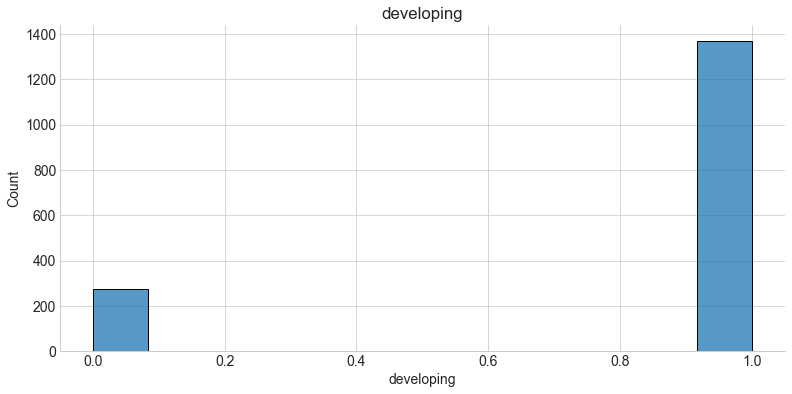

In [5]:
ex.plot_distributions(train)

## Multivariate Exploration

In [6]:
#Create a list with all my continuous variables -- everything minus country, development status, and year
quant_vars = list(train.drop(columns = ['country', 'developing', 'year']).columns)
cat_vars = ['developing']
target = 'life_expectancy'

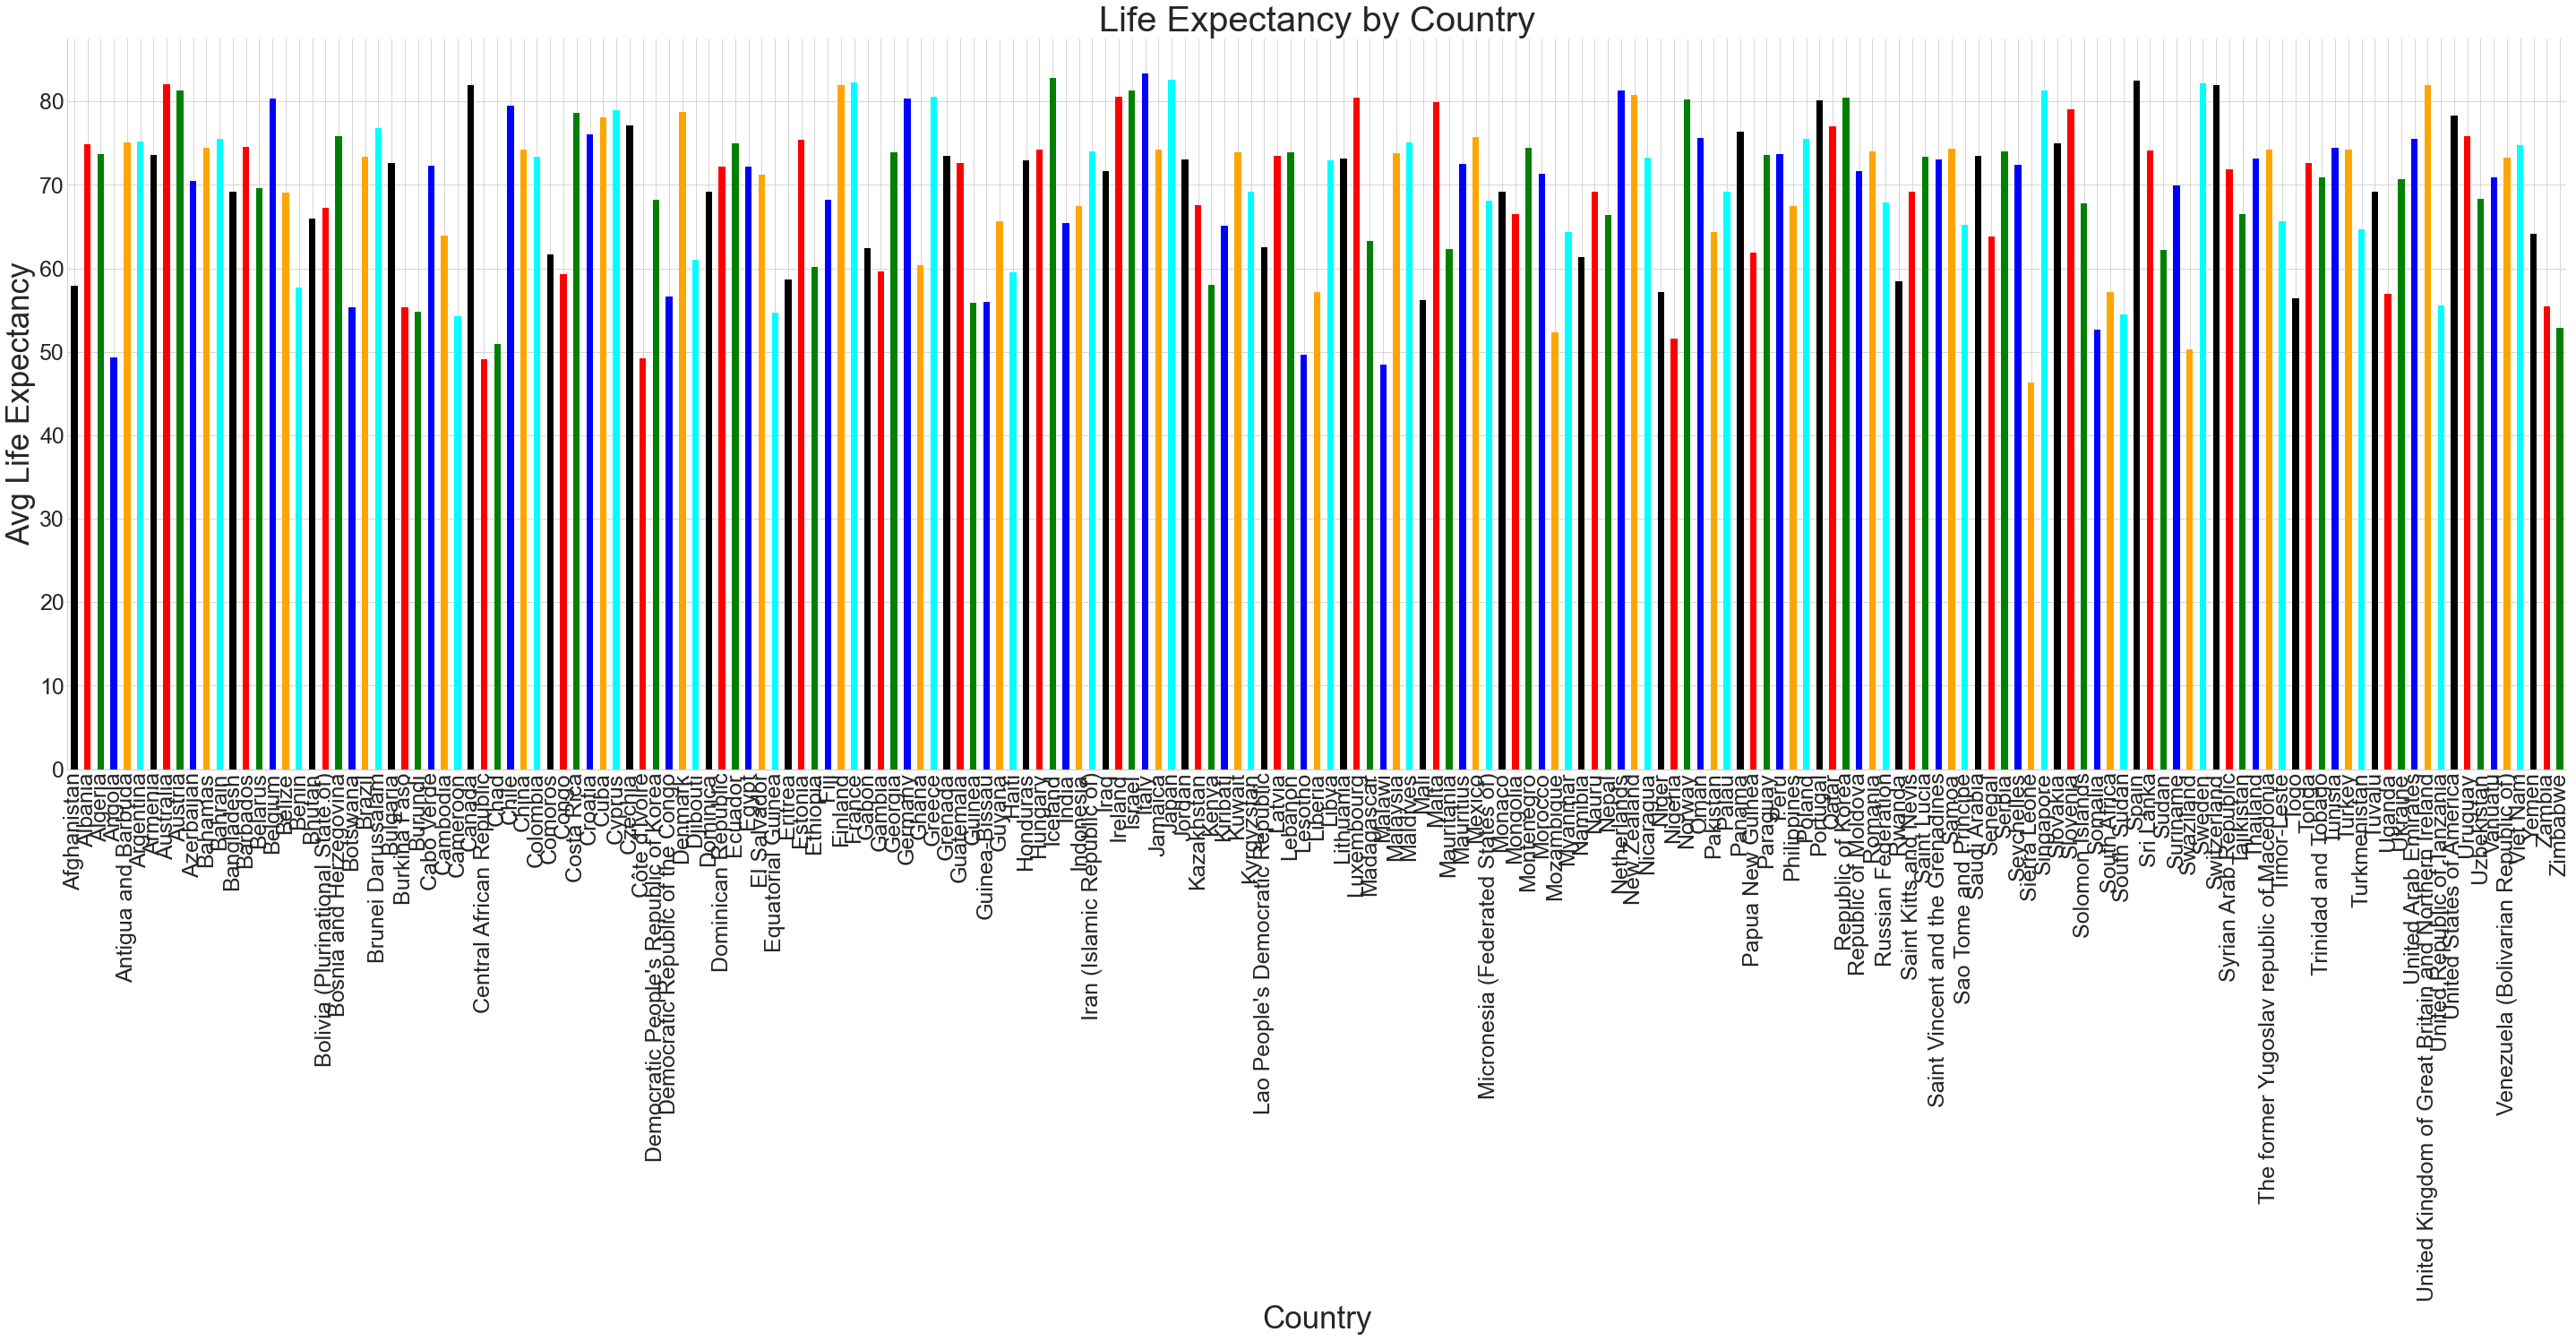

In [7]:
# I want to start by looking at life expectancy by country 
le_country = train.groupby('country')['life_expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25, color=['black', 'red', 'green', 'blue', 'orange', 'cyan'])
plt.title("Life Expectancy by Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life Expectancy",fontsize=35)
plt.show()

*Clear divisions between different countries life expectancies.*

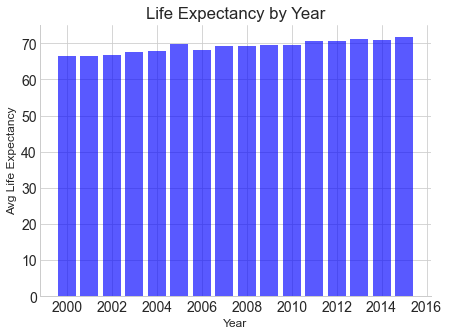

In [8]:
# Life_Expectancy by Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(train.groupby('year')['year'].count().index,train.groupby('year')['life_expectancy'].mean(),color='blue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("Life Expectancy by Year")
plt.show()

*A steady increase in life expectancy through the years.*

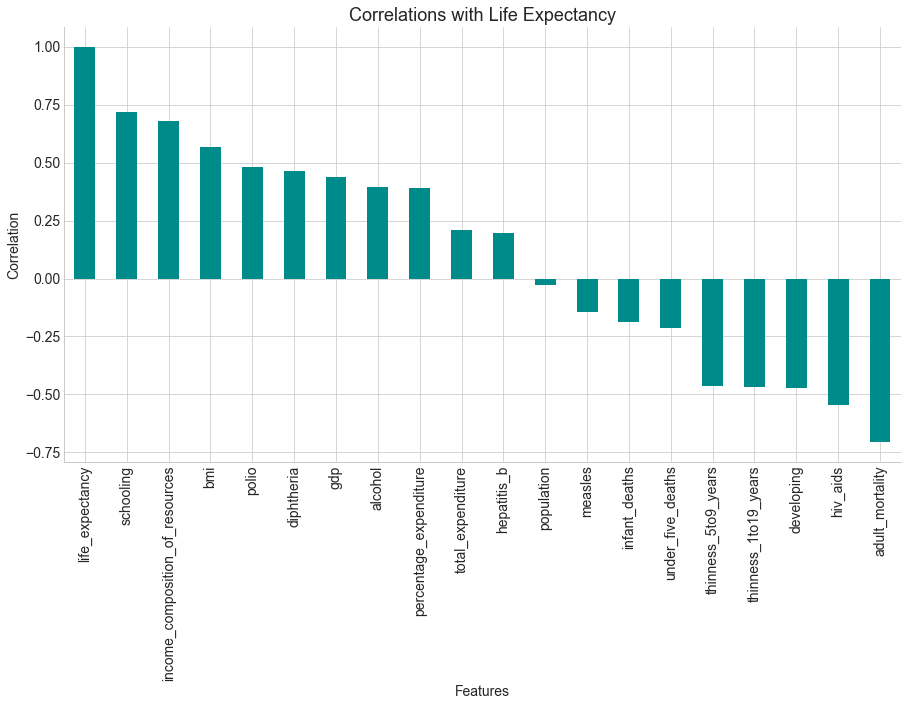

In [9]:
# Checking assessed_value correlation vs all variables

ex.plot_correlations(train)

*I immediately detect some strong correlations with my target variable, life expectancy. Schooling and income composition have the strongest positive correlation while adult_mortality and hiv_aids have very strong negative correlations. These are strong candidates for statistical testing and further exploration.* 

<AxesSubplot:>

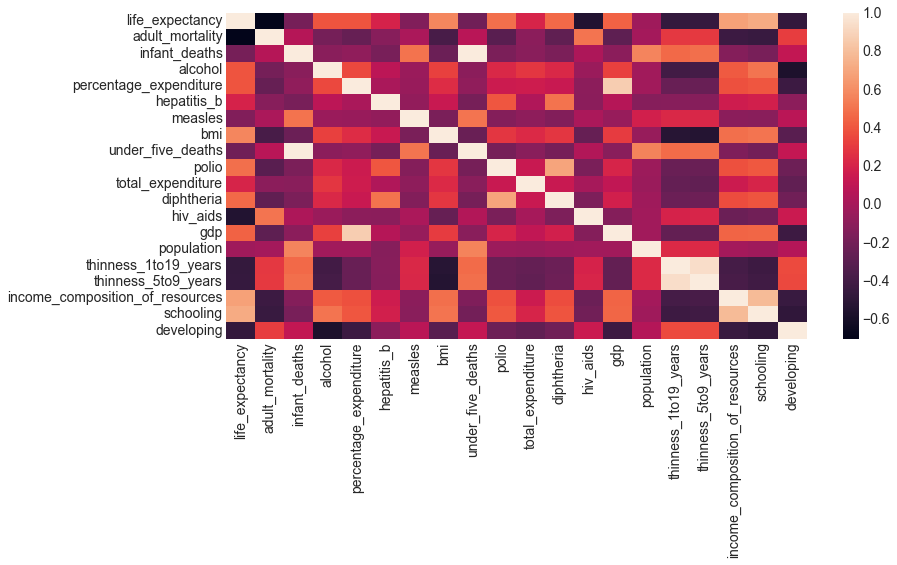

In [10]:
# Simple heatmap
sns.heatmap(train.corr())

In [11]:
# Let's create a correlation matrix and improve our heatmap
# Create the correlation matrix for all exams.

le_corr = train.drop(columns=['year', 'country']).corr()
le_corr

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling,developing
life_expectancy,1.000000,-0.705191,-0.187249,0.392868,0.388358,0.194478,-0.145999,0.567321,-0.214794,0.481242,0.207278,0.465593,-0.547451,0.439847,-0.026079,-0.465915,-0.462362,0.679549,0.717028,-0.472826
adult_mortality,-0.705191,1.000000,0.055150,-0.193300,-0.253057,-0.124287,0.016268,-0.381243,0.071305,-0.306814,-0.109796,-0.282756,0.500904,-0.287622,-0.010955,0.290419,0.298958,-0.438535,-0.449141,0.308889
infant_deaths,-0.187249,0.055150,1.000000,-0.112395,-0.088835,-0.181180,0.495950,-0.233365,0.996640,-0.168333,-0.116689,-0.167469,0.027486,-0.111332,0.560383,0.466915,0.483953,-0.134885,-0.182828,0.111588
alcohol,0.392868,-0.193300,-0.112395,1.000000,0.351202,0.082082,-0.051829,0.321226,-0.110887,0.220758,0.283439,0.224425,-0.051568,0.321648,-0.020892,-0.407955,-0.395410,0.408545,0.500749,-0.573814
percentage_expenditure,0.388358,-0.253057,-0.088835,0.351202,1.000000,0.008788,-0.055447,0.241596,-0.091677,0.154006,0.157490,0.139962,-0.101865,0.866161,-0.023925,-0.249239,-0.250914,0.378781,0.396365,-0.432596
hepatitis_b,0.194478,-0.124287,-0.181180,0.082082,0.008788,1.000000,-0.082752,0.136433,-0.185885,0.400305,0.040552,0.494937,-0.106296,0.054176,-0.126335,-0.120828,-0.126588,0.154520,0.175348,-0.104804
measles,-0.145999,0.016268,0.495950,-0.051829,-0.055447,-0.082752,1.000000,-0.172781,0.502304,-0.136831,-0.094761,-0.140390,0.018611,-0.065115,0.175259,0.220678,0.218287,-0.105781,-0.117197,0.074528
bmi,0.567321,-0.381243,-0.233365,0.321226,0.241596,0.136433,-0.172781,1.000000,-0.244697,0.285861,0.232802,0.285082,-0.253808,0.300786,-0.061328,-0.531568,-0.539875,0.486922,0.506093,-0.309431
under_five_deaths,-0.214794,0.071305,0.996640,-0.110887,-0.091677,-0.185885,0.502304,-0.244697,1.000000,-0.187808,-0.118698,-0.188000,0.041609,-0.115665,0.556665,0.472244,0.486794,-0.154710,-0.200176,0.114947
polio,0.481242,-0.306814,-0.168333,0.220758,0.154006,0.400305,-0.136831,0.285861,-0.187808,1.000000,0.137317,0.689651,-0.178430,0.203385,-0.039507,-0.241486,-0.242193,0.374648,0.401261,-0.232195


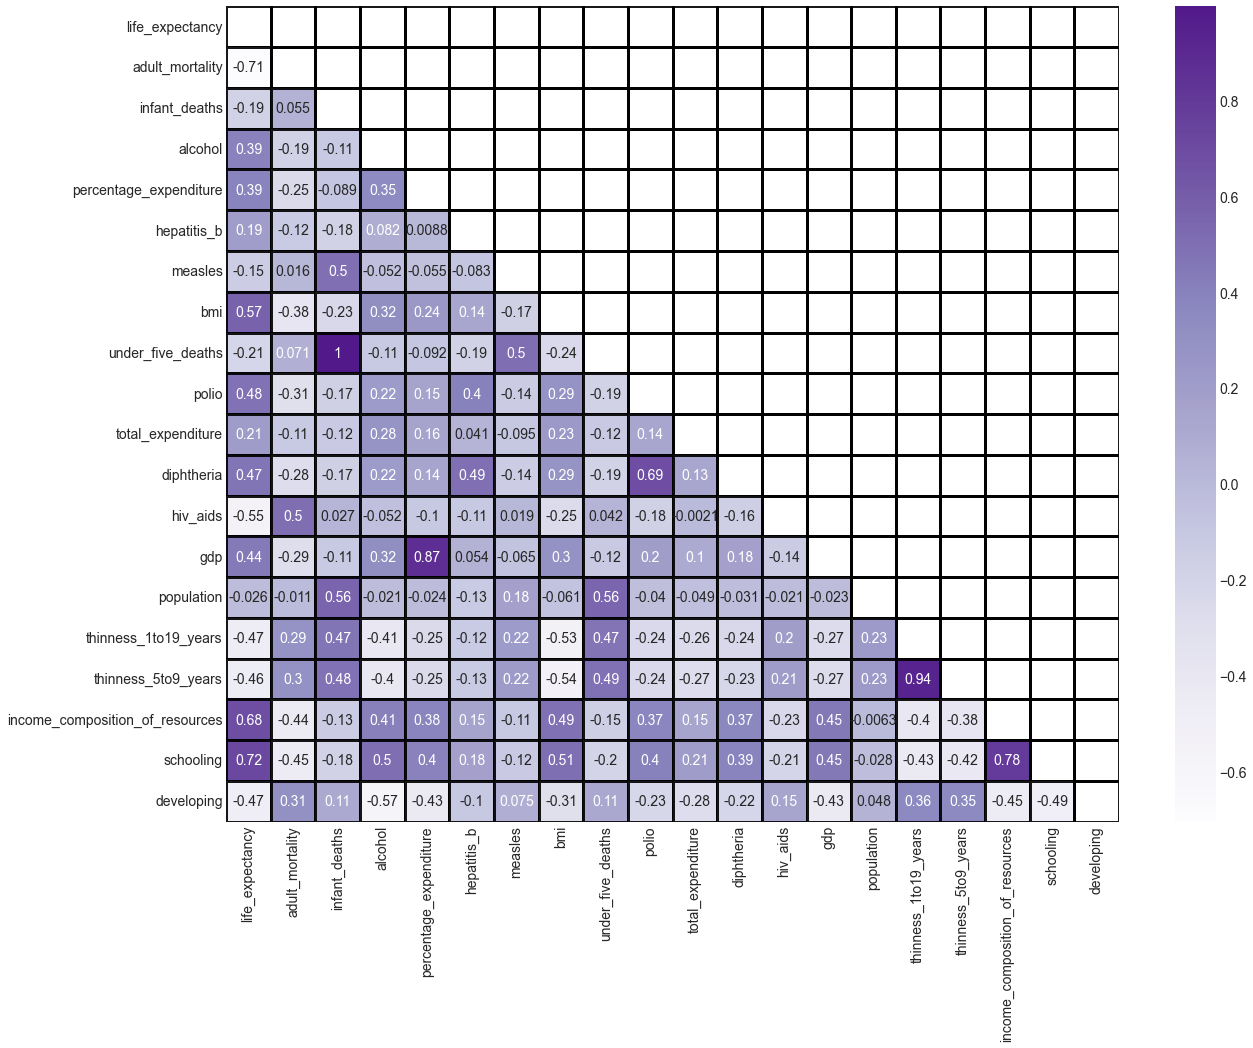

In [12]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(20, 15))
sns.heatmap(le_corr, cmap='Purples', annot=True, mask= np.triu(le_corr), **kwargs)
plt.show()

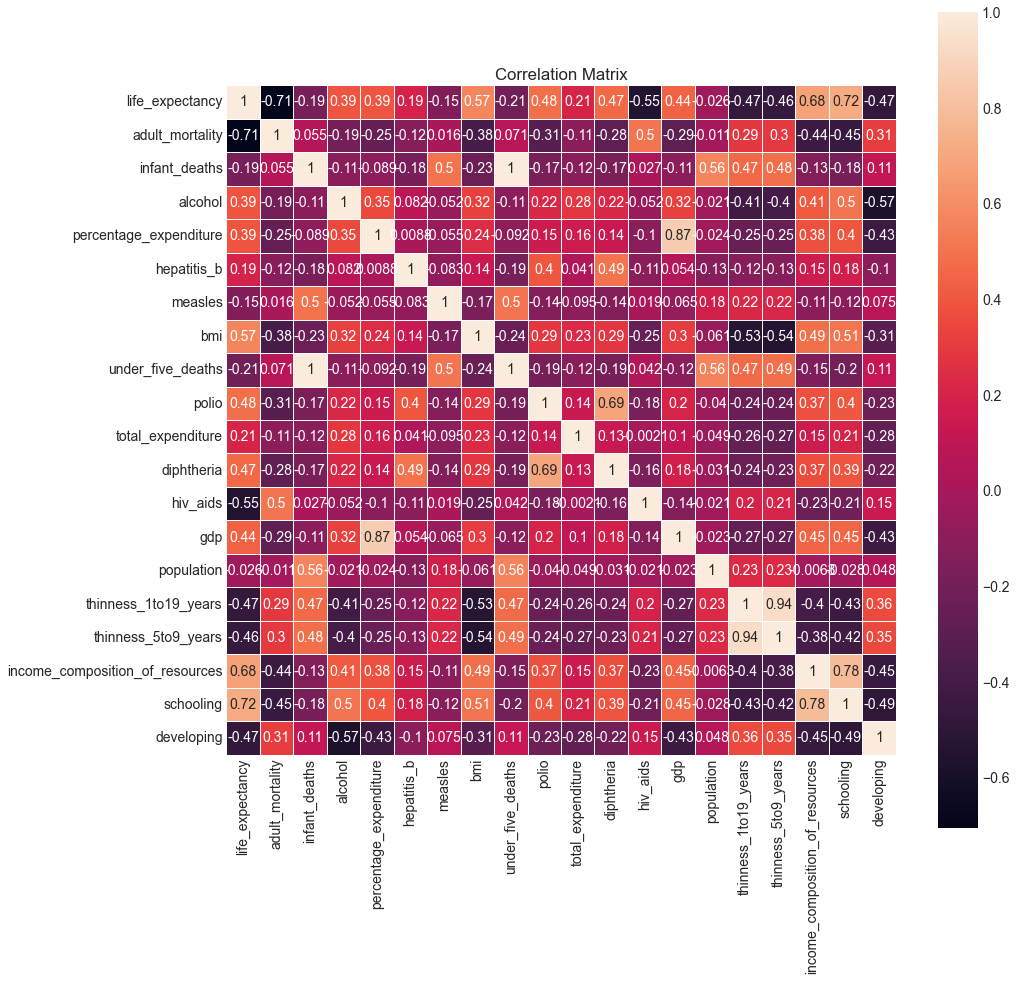

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(le_corr, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

*Takeaways:*

- Life expectancy negatively correlated with adult mortality, which makes perfect sense since. 
- Life expectancy highly correlated with income composition and schooling.
- Infant deaths and under five deaths are perfectly correlated. They seem like they are duplicate features measuring the same thing.
- Percentage expenditure and gdp are highly correlated.
- Measles and under five deaths are moderately correlated
- BMI and the thinness variables are negatively correlated.
- Polio and diphtheria are highly correlated.
- Schooling and diphtheria have a moderate correlation.
- Population and infant deaths/under five deaths are highly correlated.
- Thinness variables are highly correlated to eachother. If you're thin as an infant you're likely thin as an adolescent.
- Schooling and income composition are highly correlated.
- Alcohol is negatively correlated with developing countries.

### Initial Questions to Answer

1. Is there a linear relationship between income composition of resources and life expectancy?
2. Is there a linear relationship between schooling and life expectancy? Is this a real correlation or is it because schooling is correlated with income composition? Which is the more important causal variable for life expectancy?
3. Is there a significant relationship between being a developing country and infant mortality?
4. Is there a signifiant relationship between gdp and life expectancy?
5. Is there a linear relationship between hiv_aids prevelance and life expectancy?

*Setting my confidence level at 95% which makes my alpha = .05*


## Question 1: Is there a linear relationship between income composition of resources and life expectancy?

$H0$: Income composition of resources and life expectancy are not linearly correlated.

$Ha$: Income composition of resources and life expectancy are linearly correlated.

In [14]:
target = train.life_expectancy
ex.pearsonr(train.income_composition_of_resources, target )

The correlation value between the two variables is 0.6795 and the P-Value is 2.755585597724049e-223.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


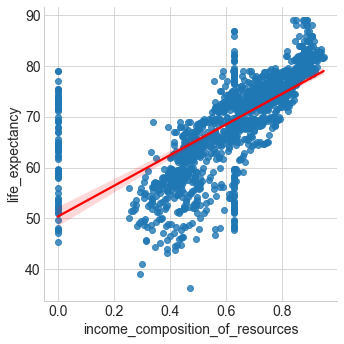

In [15]:
# Create a line plot with regression line to visualize relationship
sns.lmplot(x='income_composition_of_resources', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.show()

## 2. Is there a linear relationship between schooling and life expectancy? Is this a real correlation or is it because schooling is correlated with income composition? Which is the more important causal variable for life expectancy?

$H0$: Schooling and life expectancy are not linearly correlated.

$Ha$: Schooling and life expectancy are linearly correlated.

In [16]:
ex.pearsonr(train.schooling, target )

The correlation value between the two variables is 0.717 and the P-Value is 8.231478299453136e-260.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


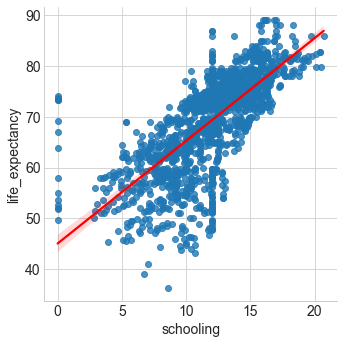

In [17]:
# Create a line plot with regression line to visualize relationship
sns.lmplot(x='schooling', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.show()

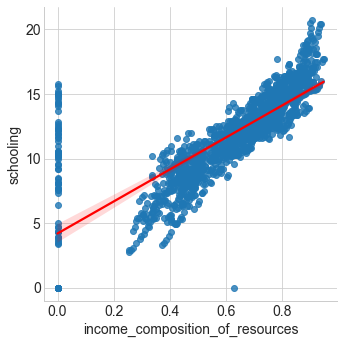

In [18]:
# Let's visualize the relationship between schooling and income composition
sns.lmplot(x='income_composition_of_resources', y='schooling', data=train, line_kws={'color':'red'})

*There's a clear linear relationship between the two. That said, schooling has a slightly higher correlation with life expectancy than income_composition though the relationship looks remarkably similar suggesting they are deeply intertwined. I suspect the income_composition is what drives schooling and is the true driver of life_expectancy.*

## 3. Is there a significant relationship between being a developing country and infant deaths(mortality)?

$H0$: Being a developing country and infant mortality are independent of eachother.

$Ha$: Being a developing country and infant mortality are dependent on eachother.

In [19]:
ex.chi2(train.developing, train.infant_deaths)

The chi2 value between the two variables is 283.50600404494804 and the P-Value is 2.694225742010064e-08.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


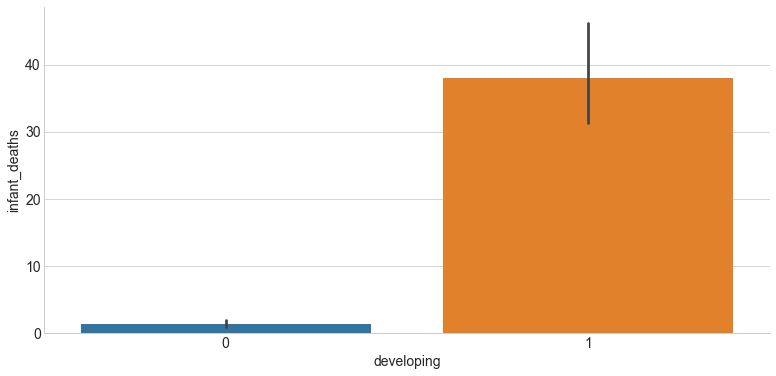

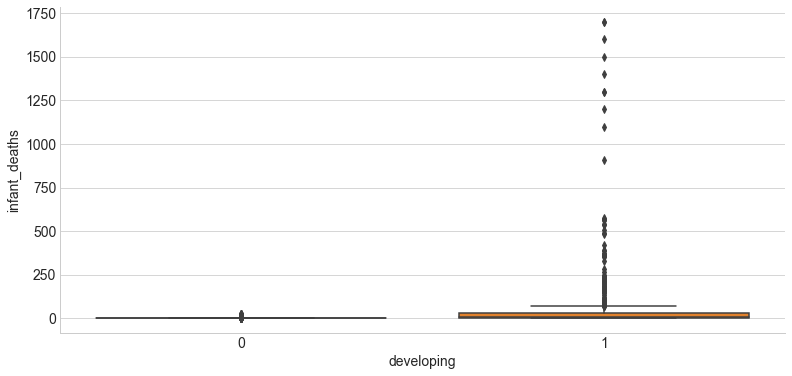

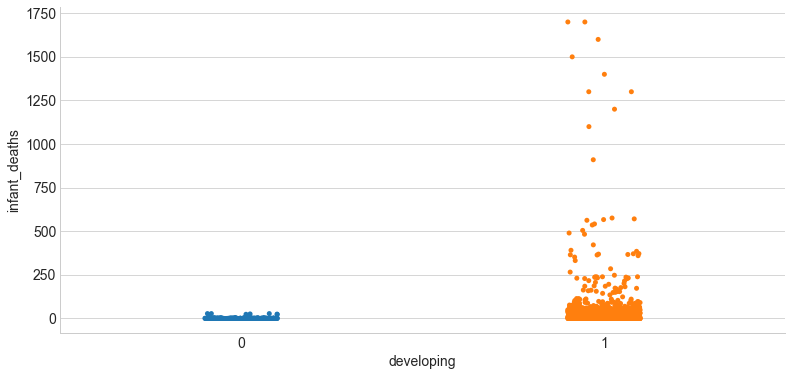

In [20]:
ex.plot_categorical_and_continuous_vars(train, 'developing', 'infant_deaths')

<AxesSubplot:xlabel='hiv_aids', ylabel='life_expectancy'>

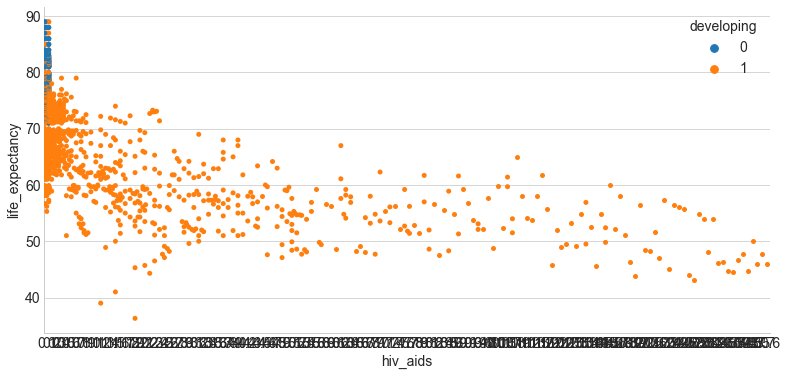

In [21]:
sns.swarmplot(x='hiv_aids', y='life_expectancy', data=train, hue='developing')

## 4. Is there a significant linear relationship between gdp and life expectancy?

$H0$: GDP and life expectancy are not linearly correlated.

$Ha$: GDP and life expectancy are linearly correlated.

In [22]:
ex.pearsonr(train.gdp, target)

The correlation value between the two variables is 0.4398 and the P-Value is 8.718050871336223e-79.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


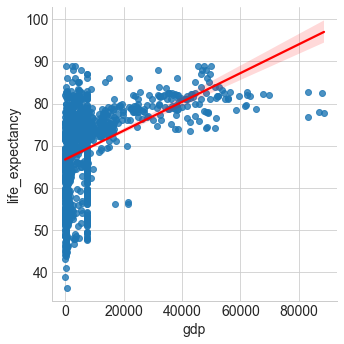

In [23]:
# Create a line plot with regression line to visualize relationship
sns.lmplot(x='gdp', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.show()

*We have quite a few visible outliers here, where low gdp countries have high life expectancy.*

## 5. Is there a linear relationship between hiv_aids prevelance and life expectancy?

$H0$: HIV prevelance and life expectancy are not linearly correlated.

$Ha$: HIV prevelance and life expectancy are linearly correlated.

In [24]:
ex.pearsonr(train.hiv_aids, target)

The correlation value between the two variables is -0.5475 and the P-Value is 2.8503874566418877e-129.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


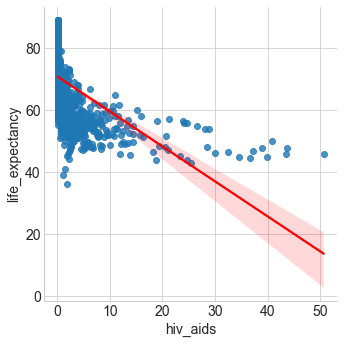

In [25]:
sns.lmplot(x='hiv_aids', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.show()

## Other Variable Interactions

<AxesSubplot:xlabel='developing', ylabel='life_expectancy'>

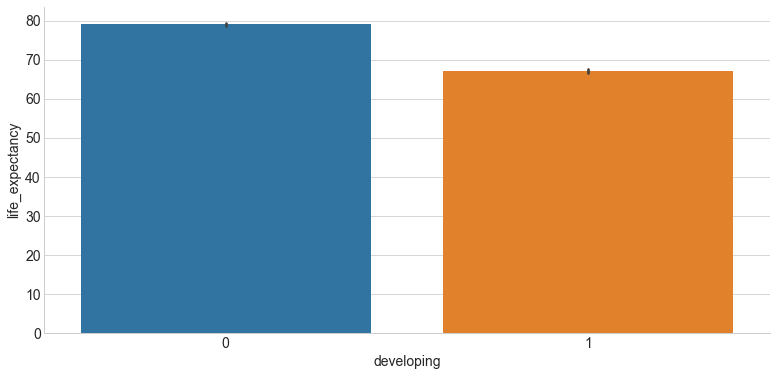

In [26]:
# Let's look at developing countries and life_expectancy

sns.barplot(x='developing', y='life_expectancy', data= train)

*As expected, we see higher life expectancy among developed countries.*

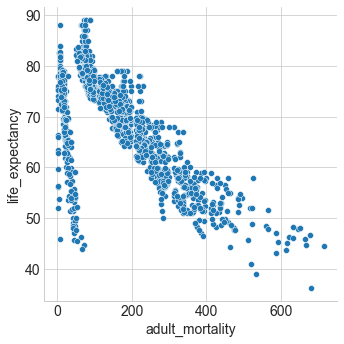

In [27]:
sns.relplot('adult_mortality', 'life_expectancy', data=train)

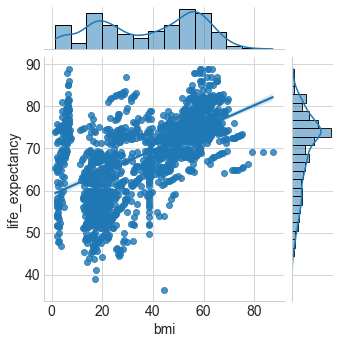

In [28]:
# Let's look at bmi
sns.jointplot(x="bmi", y="life_expectancy", data=train,  kind='reg', height=5)
plt.show()

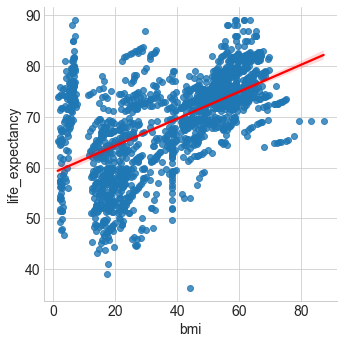

In [29]:
sns.lmplot(x='bmi', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.show()

*A very clear positive linear relationship here which is confusing as I would suspect higher bmi is negatively correlated with life expectancy. Not sure what's goin on. I'll run a statistical test to confim.*

$H0$: BMI and life expectancy are not linearly correlated.

$Ha$: BMI and life expectancy are linearly correlated.

In [30]:
ex.pearsonr(train.bmi, target)

The correlation value between the two variables is 0.5673 and the P-Value is 9.384497585199734e-141.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


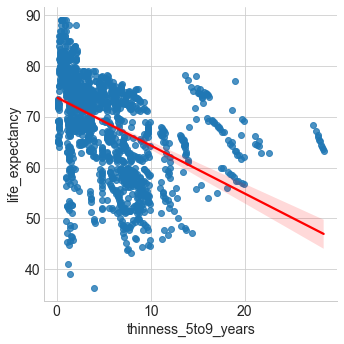

In [31]:
sns.lmplot(x='thinness_5to9_years', y='life_expectancy', data=train, line_kws={'color':'red'})
plt.show()

*I'm seeing a negative relationship which is quite strange as I would think a higher thinness score would equate to higher life expectancy.*

**Another question that comes to mind is how different rates of immunization will affect child mortality or deaths under five? Let's explore that.**

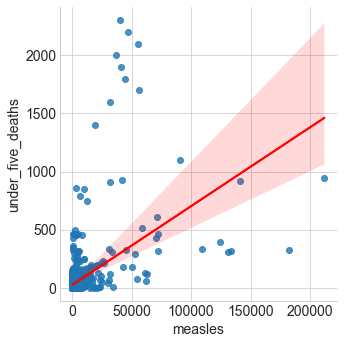

In [32]:
sns.lmplot(x='measles', y='under_five_deaths', data=train, line_kws={'color':'red'})
plt.show()

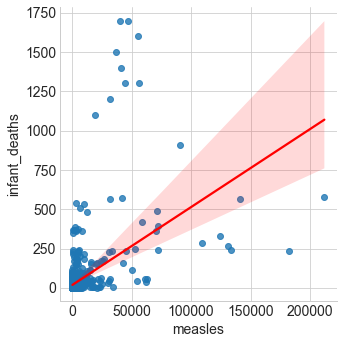

In [35]:
sns.lmplot(x='measles', y='infant_deaths', data=train, line_kws={'color':'red'})
plt.show()

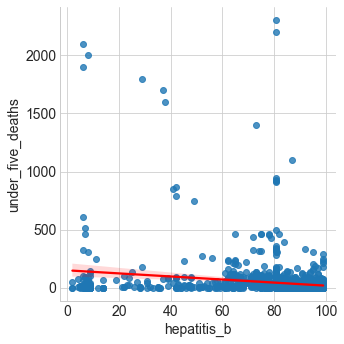

In [34]:
sns.lmplot(x='hepatitis_b', y='under_five_deaths', data=train, line_kws={'color':'red'})
plt.show()

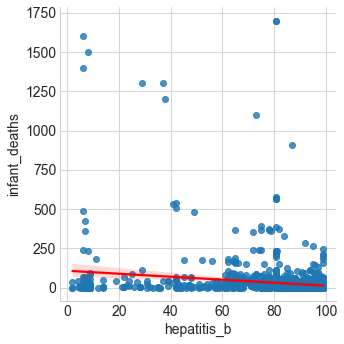

In [37]:
sns.lmplot(x='hepatitis_b', y='infant_deaths', data=train, line_kws={'color':'red'})
plt.show()

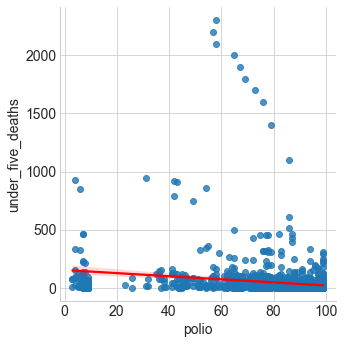

In [33]:
sns.lmplot(x='polio', y='under_five_deaths', data=train, line_kws={'color':'red'})
plt.show()

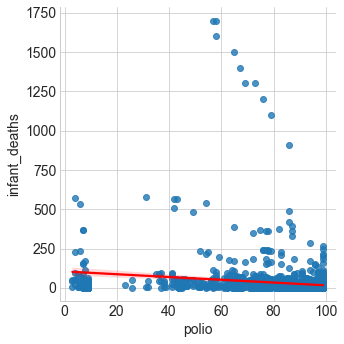

In [38]:
sns.lmplot(x='polio', y='infant_deaths', data=train, line_kws={'color':'red'})
plt.show()

*The relationship between mealses vaccination and under five deaths looks like a linear relationship but polio and hepatitis b is not at all what I expected and looks very odd.*

*Again, it seems that under_five_deaths and infant_deaths are close to identitcal.*

Takeaways: 

To reduce dimensionality, I'll make regression models that utilize my top drivers as confirmed by my statistical tests. 

These features include:
- income_composition_of_resources
- schooling
- hiv_aids
- gdp
- developing
- bmi

**I'll continue with modeling in a seperate notebook.**